
**INTRODUCTION**


R and Python are the two most popular programming languages used by data analysts and data scientists. Both are free and and open source, and were developed in the early 1990s—R for statistical analysis and Python as a general-purpose programming language.

But python alongwith its humongous external library support has made quite a buzz in data science community.

But how to decide  which is better ? what should a beginner learn first?

Lets dive in the data to find the answer!

> ****

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import base64
import io
from scipy.misc import imread
import codecs
from IPython.display import HTML
from matplotlib_venn import venn2,venn2_circles

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

RespondentTypeREADME.txt
conversionRates.csv
freeformResponses.csv
multipleChoiceResponses.csv
schema.csv



**DATA**

In [2]:
multi_response=pd.read_csv('../input/multipleChoiceResponses.csv',encoding='ISO-8859-1')

In [3]:
multi_response.shape

(16716, 228)

In [4]:
pd.set_option('display.max_columns',300)
multi_response.head(3)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,JobSkillImportancePython,JobSkillImportanceR,JobSkillImportanceSQL,JobSkillImportanceKaggleRanking,JobSkillImportanceMOOC,JobSkillImportanceVisualizations,JobSkillImportanceOtherSelect1,JobSkillImportanceOtherSelect2,JobSkillImportanceOtherSelect3,CoursePlatformSelect,HardwarePersonalProjectsSelect,TimeSpentStudying,ProveKnowledgeSelect,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,FirstTrainingSelect,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,MLSkillsSelect,MLTechniquesSelect,ParentsEducation,EmployerIndustry,EmployerSize,EmployerSizeChange,EmployerMLTime,EmployerSearchMethod,UniversityImportance,JobFunctionSelect,WorkHardwareSelect,WorkDataTypeSelect,WorkProductionFrequency,WorkDatasetSize,WorkAlgorithmsSelect,WorkToolsSelect,WorkToolsFrequencyAmazonML,WorkToolsFrequencyAWS,WorkToolsFrequencyAngoss,WorkToolsFrequencyC,WorkToolsFrequencyCloudera,WorkToolsFrequencyDataRobot,WorkToolsFrequencyFlume,WorkToolsFrequencyGCP,WorkToolsFrequencyHadoop,WorkToolsFrequencyIBMCognos,WorkToolsFrequencyIBMSPSSModeler,WorkToolsFrequencyIBMSPSSStatistics,WorkToolsFrequencyIBMWatson,WorkToolsFrequencyImpala,WorkToolsFrequencyJava,WorkToolsFrequencyJulia,WorkToolsFrequencyJupyter,WorkToolsFrequencyKNIMECommercial,WorkToolsFrequencyKNIMEFree,WorkToolsFrequencyMathematica,WorkToolsFrequencyMATLAB,WorkToolsFrequencyAzure,WorkToolsFrequencyExcel,WorkToolsFrequencyMicrosoftRServer,WorkToolsFrequencyMicrosoftSQL,WorkToolsFrequencyMinitab,WorkToolsFrequencyNoSQL,WorkToolsFrequencyOracle,WorkToolsFrequencyOrange,WorkToolsFrequencyPerl,WorkToolsFrequencyPython,WorkToolsFrequencyQlik,WorkToolsFrequencyR,WorkToolsFrequencyRapidMinerCommercial,WorkToolsFrequencyRapidMinerFree,WorkToolsFrequencySalfrod,WorkToolsFrequencySAPBusinessObjects,WorkToolsFrequencySASBase,WorkToolsFrequencySASEnterprise,WorkToolsFrequencySASJMP,WorkToolsFrequencySpark,WorkToolsFrequencySQL,WorkToolsFrequencyStan,WorkToolsFrequencyStatistica,WorkToolsFrequencyTableau,WorkToolsFrequencyTensorFlow,WorkToolsFrequencyTIBCO,WorkToolsFrequencyUnix,WorkToolsFrequencySelect1,WorkToolsFrequencySelect2,WorkFrequencySelect3,WorkMethodsSelect,WorkMethodsFrequencyA/B,WorkMethodsFrequencyAssociationRules,WorkMethodsFrequencyBayesian,WorkMethodsFrequencyCNNs,WorkMethodsFrequencyCollaborativeFiltering,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyEnsembleMethods,WorkMethodsFrequencyEvolutionaryApproaches,WorkMethodsFrequencyGANs,WorkMethodsFrequencyGBM,WorkMethodsFrequencyHMMs,WorkMethodsFrequencyKNN,WorkMethodsFrequencyLiftAnalysis,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyMLN,WorkMethodsFrequencyNaiveBayes,WorkMethodsFrequencyNLP,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyPrescripti

In [5]:
conver_rates=pd.read_csv('../input/conversionRates.csv')
conver_rates.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
conver_rates.head()

,originCountry,exchangeRate
0,USD,1.000000
1,EUR,1.195826
2,INR,0.015620
3,GBP,1.324188
4,BRL,0.321350


In [7]:
multi_response['CompensationAmount']=multi_response['CompensationAmount'].str.replace(',','')
multi_response['CompensationAmount']=multi_response['CompensationAmount'].str.replace('-','')
response=multi_response.dropna(subset=['WorkToolsSelect'])
response=response.merge(conver_rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
python_user=response[(response['WorkToolsSelect'].str.contains('Python'))&(~response['WorkToolsSelect'].str.contains('R'))]
R_user=response[(~response['WorkToolsSelect'].str.contains('Python'))&(response['WorkToolsSelect'].str.contains('R'))]
using_both=response[(response['WorkToolsSelect'].str.contains('Python'))&(response['WorkToolsSelect'].str.contains('R'))]

**General Recommendation for Beginners**

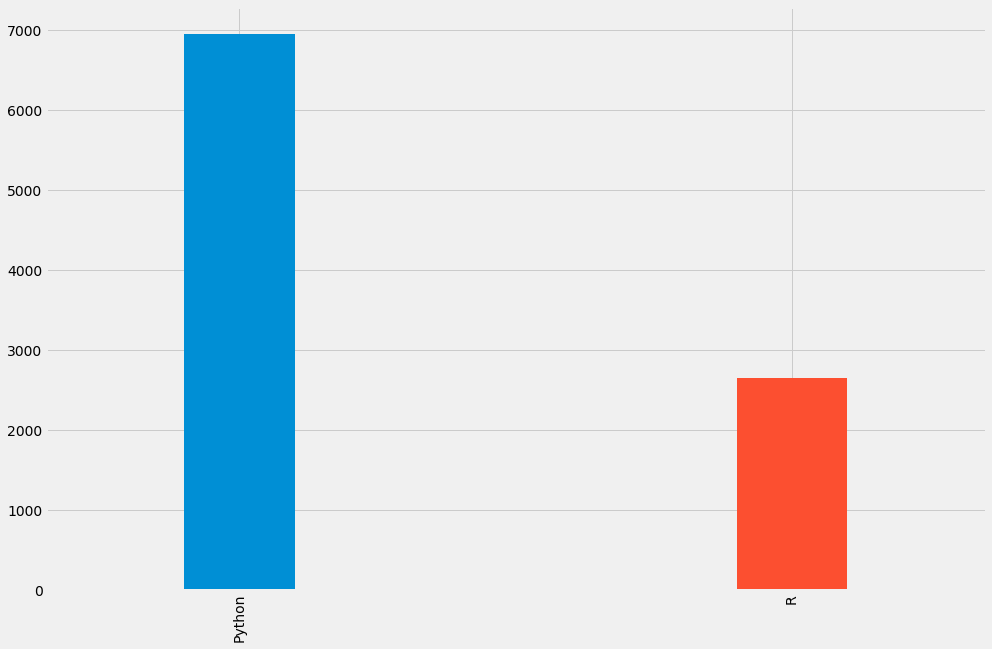

In [8]:
multi_response['LanguageRecommendationSelect'].value_counts()[:2].plot.bar(figsize = (15,10),width= .2)
plt.show()

Seems quite true.

**What users Say?**

In [9]:
index1=python_user['LanguageRecommendationSelect'].value_counts()[:5].index
value1=python_user['LanguageRecommendationSelect'].value_counts()[:5].values

index2=R_user['LanguageRecommendationSelect'].value_counts()[:5].index
value2=R_user['LanguageRecommendationSelect'].value_counts()[:5].values


layout= go.Layout(images= [dict(
        source= "https://images.plot.ly/language-icons/api-home/python-logo.png",
        xref= "paper",
        yref= "paper",
        x= .3,
        y= .39,
        sizex= .22,
        sizey= .22,
        xanchor= "right",
        yanchor= "bottom"
      ),
      dict(
        source= "https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/R_logo.svg/1086px-R_logo.svg.png",
        xref= "paper",
        yref= "paper",
        x= .69,
        y= .6,
        sizex= .2,
        sizey= .2,
#         sizing= "stretch",
        opacity= 1,
        layer= "below"
      )],
     xaxis = dict( autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=False),
    yaxis = dict( autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=False), 
    title="What Python and R users recommend",
    annotations= [
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                 "text": "",
                "x": 0.16,
                "y": 0.5
            },      
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "",
                "x": 0.79,
                "y": 0.5}] )
fig=go.Figure(data= [
    {
      "values": value1,
      "labels": index1,
      "domain": {"x": [0, .48]},
      "name": "Recommends",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": value2 ,
      "labels": index2,
      "text":"CO2",
      "textposition":"inside",
      "domain": {"x": [.54, 1]},
      "name": "Recommends",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],layout=layout)
plt.savefig('n.png')
py.iplot(fig)

ValueError: Invalid property specified for object of type plotly.graph_objs.layout.XAxis: 'autotick'

    Valid properties:
        anchor
            If set to an opposite-letter axis id (e.g. `x2`, `y`),
            this axis is bound to the corresponding opposite-letter
            axis. If set to *free*, this axis' position is
            determined by `position`.
        automargin
            Determines whether long tick labels automatically grow
            the figure margins.
        autorange
            Determines whether or not the range of this axis is
            computed in relation to the input data. See `rangemode`
            for more info. If `range` is provided, then `autorange`
            is set to *false*.
        calendar
            Sets the calendar system to use for `range` and `tick0`
            if this is a date axis. This does not set the calendar
            for interpreting data on this axis, that's specified in
            the trace or via the global `layout.calendar`
        categoryarray
            Sets the order in which categories on this axis appear.
            Only has an effect if `categoryorder` is set to
            *array*. Used with `categoryorder`.
        categoryarraysrc
            Sets the source reference on plot.ly for  categoryarray
            .
        categoryorder
            Specifies the ordering logic for the case of
            categorical variables. By default, plotly uses *trace*,
            which specifies the order that is present in the data
            supplied. Set `categoryorder` to *category ascending*
            or *category descending* if order should be determined
            by the alphanumerical order of the category names. Set
            `categoryorder` to *array* to derive the ordering from
            the attribute `categoryarray`. If a category is not
            found in the `categoryarray` array, the sorting
            behavior for that attribute will be identical to the
            *trace* mode. The unspecified categories will follow
            the categories in `categoryarray`.
        color
            Sets default for all colors associated with this axis
            all at once: line, font, tick, and grid colors. Grid
            color is lightened by blending this with the plot
            background Individual pieces can override this.
        constrain
            If this axis needs to be compressed (either due to its
            own `scaleanchor` and `scaleratio` or those of the
            other axis), determines how that happens: by increasing
            the *range* (default), or by decreasing the *domain*.
        constraintoward
            If this axis needs to be compressed (either due to its
            own `scaleanchor` and `scaleratio` or those of the
            other axis), determines which direction we push the
            originally specified plot area. Options are *left*,
            *center* (default), and *right* for x axes, and *top*,
            *middle* (default), and *bottom* for y axes.
        domain
            Sets the domain of this axis (in plot fraction).
        dtick
            Sets the step in-between ticks on this axis. Use with
            `tick0`. Must be a positive number, or special strings
            available to *log* and *date* axes. If the axis `type`
            is *log*, then ticks are set every 10^(n*dtick) where n
            is the tick number. For example, to set a tick mark at
            1, 10, 100, 1000, ... set dtick to 1. To set tick marks
            at 1, 100, 10000, ... set dtick to 2. To set tick marks
            at 1, 5, 25, 125, 625, 3125, ... set dtick to
            log_10(5), or 0.69897000433. *log* has several special
            values; *L<f>*, where `f` is a positive number, gives
            ticks linearly spaced in value (but not position). For
            example `tick0` = 0.1, `dtick` = *L0.5* will put ticks
            at 0.1, 0.6, 1.1, 1.6 etc. To show powers of 10 plus
            small digits between, use *D1* (all digits) or *D2*
            (only 2 and 5). `tick0` is ignored for *D1* and *D2*.
            If the axis `type` is *date*, then you must convert the
            time to milliseconds. For example, to set the interval
            between ticks to one day, set `dtick` to 86400000.0.
            *date* also has special values *M<n>* gives ticks
            spaced by a number of months. `n` must be a positive
            integer. To set ticks on the 15th of every third month,
            set `tick0` to *2000-01-15* and `dtick` to *M3*. To set
            ticks every 4 years, set `dtick` to *M48*
        exponentformat
            Determines a formatting rule for the tick exponents.
            For example, consider the number 1,000,000,000. If
            *none*, it appears as 1,000,000,000. If *e*, 1e+9. If
            *E*, 1E+9. If *power*, 1x10^9 (with 9 in a super
            script). If *SI*, 1G. If *B*, 1B.
        fixedrange
            Determines whether or not this axis is zoom-able. If
            true, then zoom is disabled.
        gridcolor
            Sets the color of the grid lines.
        gridwidth
            Sets the width (in px) of the grid lines.
        hoverformat
            Sets the hover text formatting rule using d3 formatting
            mini-languages which are very similar to those in
            Python. For numbers, see: https://github.com/d3/d3-form
            at/blob/master/README.md#locale_format And for dates
            see: https://github.com/d3/d3-time-
            format/blob/master/README.md#locale_format We add one
            item to d3's date formatter: *%{n}f* for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat *%H~%M~%S.%2f* would
            display *09~15~23.46*
        layer
            Sets the layer on which this axis is displayed. If
            *above traces*, this axis is displayed above all the
            subplot's traces If *below traces*, this axis is
            displayed below all the subplot's traces, but above the
            grid lines. Useful when used together with scatter-like
            traces with `cliponaxis` set to *false* to show markers
            and/or text nodes above this axis.
        linecolor
            Sets the axis line color.
        linewidth
            Sets the width (in px) of the axis line.
        mirror
            Determines if the axis lines or/and ticks are mirrored
            to the opposite side of the plotting area. If *true*,
            the axis lines are mirrored. If *ticks*, the axis lines
            and ticks are mirrored. If *false*, mirroring is
            disable. If *all*, axis lines are mirrored on all
            shared-axes subplots. If *allticks*, axis lines and
            ticks are mirrored on all shared-axes subplots.
        nticks
            Specifies the maximum number of ticks for the
            particular axis. The actual number of ticks will be
            chosen automatically to be less than or equal to
            `nticks`. Has an effect only if `tickmode` is set to
            *auto*.
        overlaying
            If set a same-letter axis id, this axis is overlaid on
            top of the corresponding same-letter axis. If *false*,
            this axis does not overlay any same-letter axes.
        position
            Sets the position of this axis in the plotting space
            (in normalized coordinates). Only has an effect if
            `anchor` is set to *free*.
        range
            Sets the range of this axis. If the axis `type` is
            *log*, then you must take the log of your desired range
            (e.g. to set the range from 1 to 100, set the range
            from 0 to 2). If the axis `type` is *date*, it should
            be date strings, like date data, though Date objects
            and unix milliseconds will be accepted and converted to
            strings. If the axis `type` is *category*, it should be
            numbers, using the scale where each category is
            assigned a serial number from zero in the order it
            appears.
        rangemode
            If *normal*, the range is computed in relation to the
            extrema of the input data. If *tozero*`, the range
            extends to 0, regardless of the input data If
            *nonnegative*, the range is non-negative, regardless of
            the input data.
        rangeselector
            plotly.graph_objs.layout.xaxis.Rangeselector instance
            or dict with compatible properties
        rangeslider
            plotly.graph_objs.layout.xaxis.Rangeslider instance or
            dict with compatible properties
        scaleanchor
            If set to another axis id (e.g. `x2`, `y`), the range
            of this axis changes together with the range of the
            corresponding axis such that the scale of pixels per
            unit is in a constant ratio. Both axes are still
            zoomable, but when you zoom one, the other will zoom
            the same amount, keeping a fixed midpoint. `constrain`
            and `constraintoward` determine how we enforce the
            constraint. You can chain these, ie `yaxis:
            {scaleanchor: *x*}, xaxis2: {scaleanchor: *y*}` but you
            can only link axes of the same `type`. The linked axis
            can have the opposite letter (to constrain the aspect
            ratio) or the same letter (to match scales across
            subplots). Loops (`yaxis: {scaleanchor: *x*}, xaxis:
            {scaleanchor: *y*}` or longer) are redundant and the
            last constraint encountered will be ignored to avoid
            possible inconsistent constraints via `scaleratio`.
        scaleratio
            If this axis is linked to another by `scaleanchor`,
            this determines the pixel to unit scale ratio. For
            example, if this value is 10, then every unit on this
            axis spans 10 times the number of pixels as a unit on
            the linked axis. Use this for example to create an
            elevation profile where the vertical scale is
            exaggerated a fixed amount with respect to the
            horizontal.
        separatethousands
            If "true", even 4-digit integers are separated
        showexponent
            If *all*, all exponents are shown besides their
            significands. If *first*, only the exponent of the
            first tick is shown. If *last*, only the exponent of
            the last tick is shown. If *none*, no exponents appear.
        showgrid
            Determines whether or not grid lines are drawn. If
            *true*, the grid lines are drawn at every tick mark.
        showline
            Determines whether or not a line bounding this axis is
            drawn.
        showspikes
            Determines whether or not spikes (aka droplines) are
            drawn for this axis. Note: This only takes affect when
            hovermode = closest
        showticklabels
            Determines whether or not the tick labels are drawn.
        showtickprefix
            If *all*, all tick labels are displayed with a prefix.
            If *first*, only the first tick is displayed with a
            prefix. If *last*, only the last tick is displayed with
            a suffix. If *none*, tick prefixes are hidden.
        showticksuffix
            Same as `showtickprefix` but for tick suffixes.
        side
            Determines whether a x (y) axis is positioned at the
            *bottom* (*left*) or *top* (*right*) of the plotting
            area.
        spikecolor
            Sets the spike color. If undefined, will use the series
            color
        spikedash
            Sets the dash style of lines. Set to a dash type string
            (*solid*, *dot*, *dash*, *longdash*, *dashdot*, or
            *longdashdot*) or a dash length list in px (eg
            *5px,10px,2px,2px*).
        spikemode
            Determines the drawing mode for the spike line If
            *toaxis*, the line is drawn from the data point to the
            axis the  series is plotted on. If *across*, the line
            is drawn across the entire plot area, and supercedes
            *toaxis*. If *marker*, then a marker dot is drawn on
            the axis the series is plotted on
        spikesnap
            Determines whether spikelines are stuck to the cursor
            or to the closest datapoints.
        spikethickness
            Sets the width (in px) of the zero line.
        tick0
            Sets the placement of the first tick on this axis. Use
            with `dtick`. If the axis `type` is *log*, then you
            must take the log of your starting tick (e.g. to set
            the starting tick to 100, set the `tick0` to 2) except
            when `dtick`=*L<f>* (see `dtick` for more info). If the
            axis `type` is *date*, it should be a date string, like
            date data. If the axis `type` is *category*, it should
            be a number, using the scale where each category is
            assigned a serial number from zero in the order it
            appears.
        tickangle
            Sets the angle of the tick labels with respect to the
            horizontal. For example, a `tickangle` of -90 draws the
            tick labels vertically.
        tickcolor
            Sets the tick color.
        tickfont
            Sets the tick font.
        tickformat
            Sets the tick label formatting rule using d3 formatting
            mini-languages which are very similar to those in
            Python. For numbers, see: https://github.com/d3/d3-form
            at/blob/master/README.md#locale_format And for dates
            see: https://github.com/d3/d3-time-
            format/blob/master/README.md#locale_format We add one
            item to d3's date formatter: *%{n}f* for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat *%H~%M~%S.%2f* would
            display *09~15~23.46*
        tickformatstops
            plotly.graph_objs.layout.xaxis.Tickformatstop instance
            or dict with compatible properties
        ticklen
            Sets the tick length (in px).
        tickmode
            Sets the tick mode for this axis. If *auto*, the number
            of ticks is set via `nticks`. If *linear*, the
            placement of the ticks is determined by a starting
            position `tick0` and a tick step `dtick` (*linear* is
            the default value if `tick0` and `dtick` are provided).
            If *array*, the placement of the ticks is set via
            `tickvals` and the tick text is `ticktext`. (*array* is
            the default value if `tickvals` is provided).
        tickprefix
            Sets a tick label prefix.
        ticks
            Determines whether ticks are drawn or not. If **, this
            axis' ticks are not drawn. If *outside* (*inside*),
            this axis' are drawn outside (inside) the axis lines.
        ticksuffix
            Sets a tick label suffix.
        ticktext
            Sets the text displayed at the ticks position via
            `tickvals`. Only has an effect if `tickmode` is set to
            *array*. Used with `tickvals`.
        ticktextsrc
            Sets the source reference on plot.ly for  ticktext .
        tickvals
            Sets the values at which ticks on this axis appear.
            Only has an effect if `tickmode` is set to *array*.
            Used with `ticktext`.
        tickvalssrc
            Sets the source reference on plot.ly for  tickvals .
        tickwidth
            Sets the tick width (in px).
        title
            Sets the title of this axis.
        titlefont
            Sets this axis' title font.
        type
            Sets the axis type. By default, plotly attempts to
            determined the axis type by looking into the data of
            the traces that referenced the axis in question.
        visible
            A single toggle to hide the axis while preserving
            interaction like dragging. Default is true when a
            cheater plot is present on the axis, otherwise false
        zeroline
            Determines whether or not a line is drawn at along the
            0 value of this axis. If *true*, the zero line is drawn
            on top of the grid lines.
        zerolinecolor
            Sets the line color of the zero line.
        zerolinewidth
            Sets the width (in px) of the zero line.
        

**From JOB perspective which is important ?**

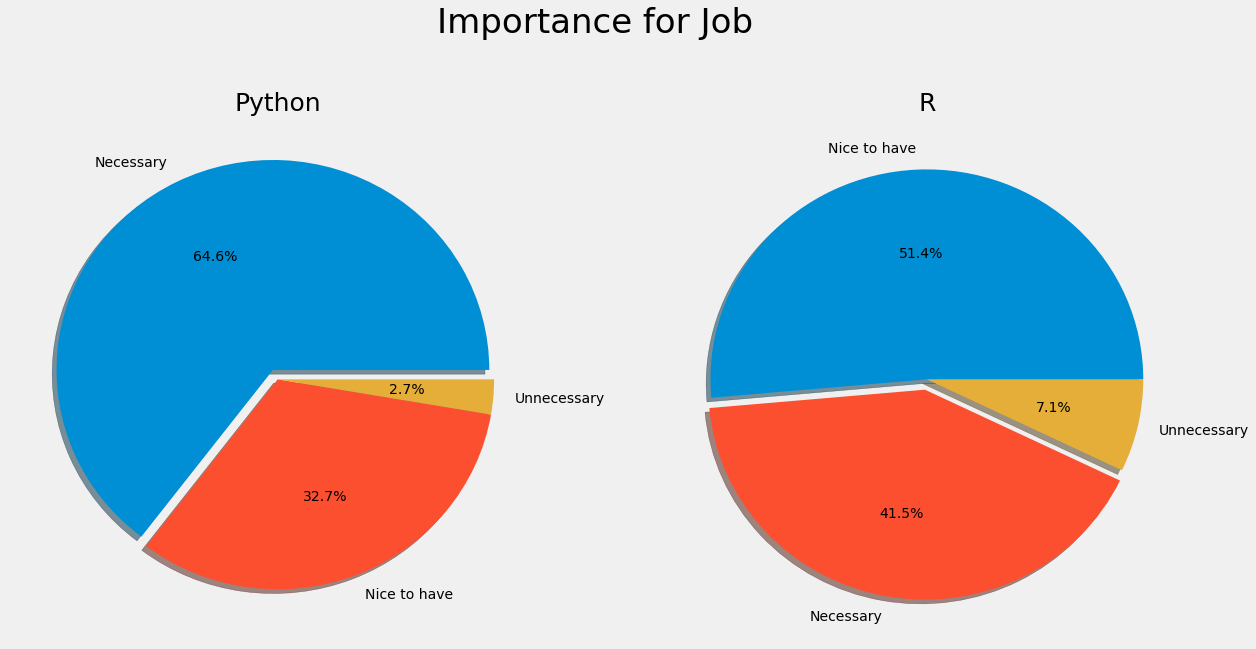

In [10]:
fig,ax=plt.subplots(1,2,figsize=(19,9))
plt.title('gdg')
multi_response['JobSkillImportancePython'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%',explode=[0.05,0,0],shadow=True)
ax[0].set_title('Python',fontsize = 25)
ax[0].set_ylabel('')
multi_response['JobSkillImportanceR'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0,0.05,0],shadow=True)
ax[1].set_title('R',fontsize = 25)
ax[1].set_ylabel('')
fig.suptitle('Importance for Job',fontsize= 34,y=1.05,x =.51)
plt.show()


We can consider they are almost equivalent but still numbers favor python.

**Popularity of Languages**


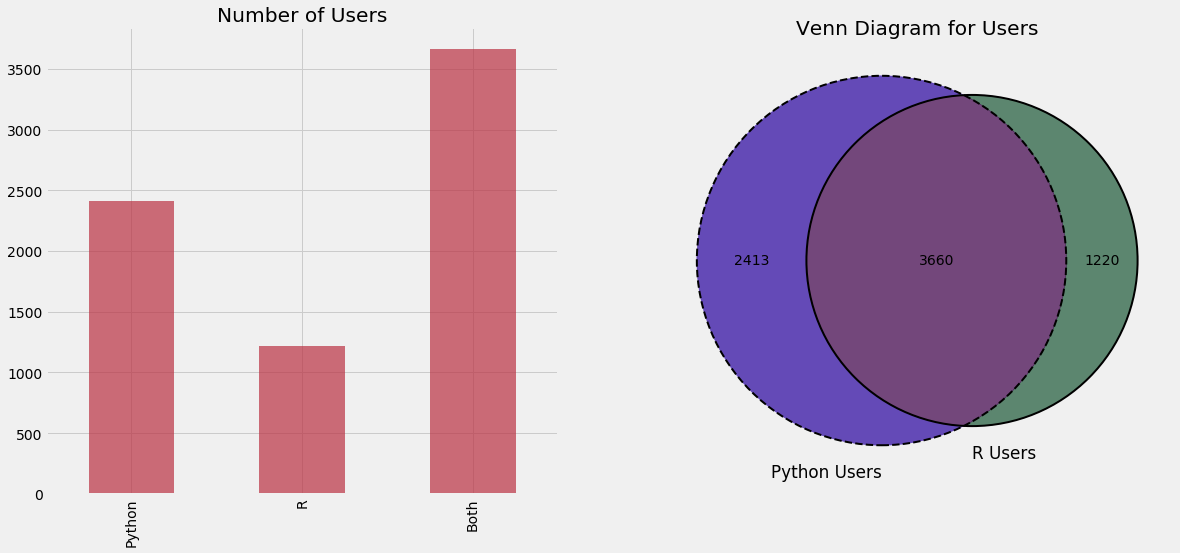

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
pd.Series([python_user.shape[0],R_user.shape[0],using_both.shape[0]],index=['Python','R','Both']).plot.bar(ax=ax[0],colors= '#BB3242',alpha= .7)
ax[0].set_title('Number of Users')

v= venn2(subsets = (python_user.shape[0],R_user.shape[0],using_both.shape[0]), set_labels = ('Python Users', 'R Users'))
plt.title('Venn Diagram for Users')

# Subset colors
v.get_patch_by_id('10').set_color('#4120A9')
v.get_patch_by_id('11').set_color('#3E004A')
v.get_patch_by_id('01').set_color('#1D5939')

# Subset alphas
v.get_patch_by_id('10').set_alpha(.8)
v.get_patch_by_id('01').set_alpha(.7)
v.get_patch_by_id('11').set_alpha(.7)

# Border styles
c = venn2_circles(subsets= (python_user.shape[0],R_user.shape[0],using_both.shape[0]), linestyle='solid')
c[0].set_ls('dashed')  # Line style
c[0].set_lw(2.0)       # Line width
plt.show()

**MONEY!!!**

In [12]:
py_salary=(pd.to_numeric(python_user['CompensationAmount'].dropna())*python_user['exchangeRate']).dropna()
py_salary=py_salary[py_salary<1000000]
R_salary=(pd.to_numeric(R_user['CompensationAmount'].dropna())*R_user['exchangeRate']).dropna()
R_salary=R_salary[R_salary<1000000]
both_salary=(pd.to_numeric(using_both['CompensationAmount'].dropna())*using_both['exchangeRate']).dropna()
both_salary=both_salary[both_salary<1000000]
total_salary=pd.DataFrame([py_salary,R_salary,both_salary])
total_salary=total_salary.transpose()
total_salary.columns=['Python','R','Both']
print('Median Salary of Python user:',total_salary['Python'].median())
print('Median Salary of R user:',total_salary['R'].median())
print('Median Salary of individual using both languages:',total_salary['Both'].median())

Median Salary of Python user: 48725.600000000006
Median Salary of R user: 48421.99999999999
Median Salary of individual using both languages: 59791.3


**Compensation**

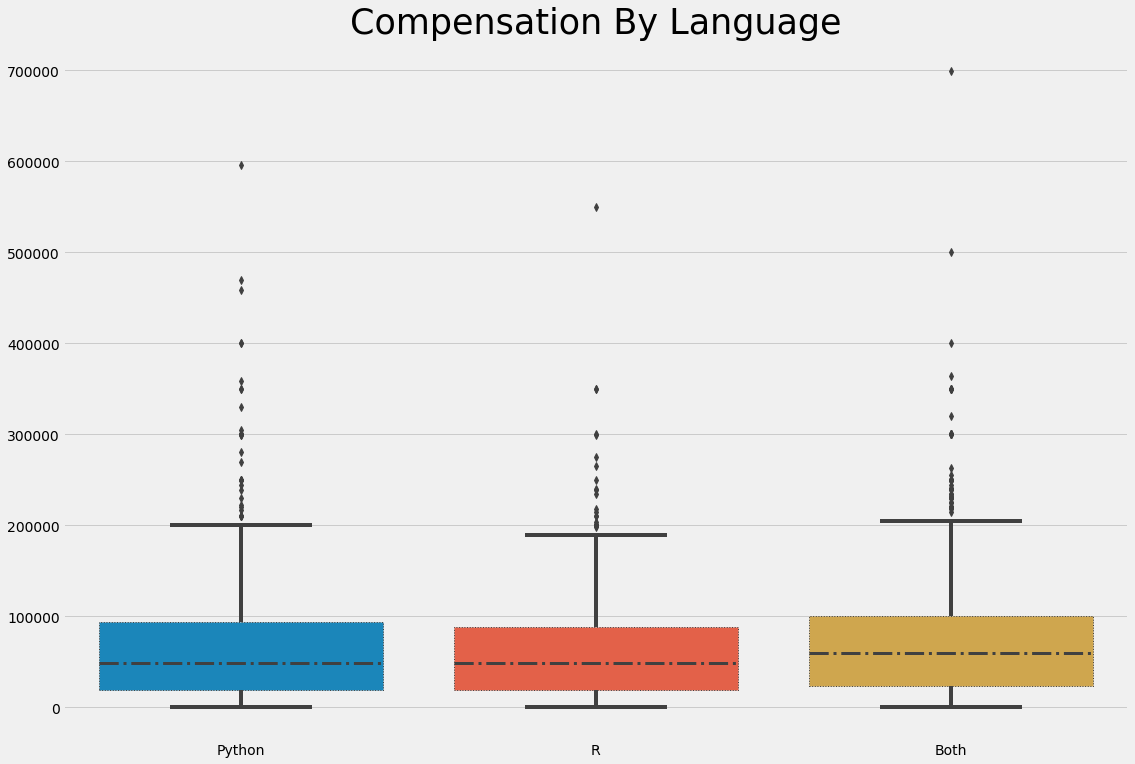

In [13]:
boxprops = dict(linestyle=':', linewidth=1)
medianprops = dict(linestyle='-.', linewidth=3)

#  bp = total_salary.boxplot(showfliers=True, showmeans=True,
#                  boxprops=boxprops, medianprops=medianprops)
sns.boxplot(data = total_salary,boxprops=boxprops, medianprops=medianprops)
plt.title('Compensation By Language',fontsize = 35)
fig=plt.gcf()
fig.set_size_inches(17,12)
plt.show()

**Job VS Language**

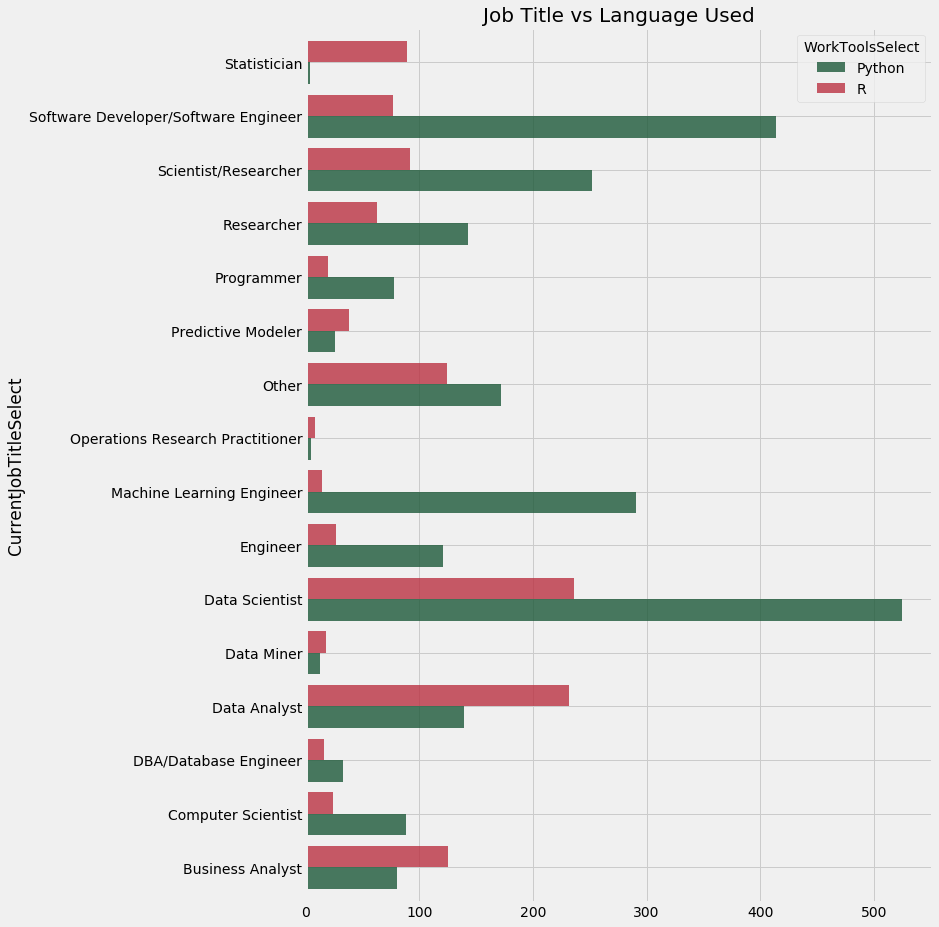

In [14]:
p=python_user.copy()
r=R_user.copy()
p['WorkToolsSelect']='Python'
r['WorkToolsSelect']='R'
combined=pd.concat([p,r])
combined=combined.groupby(['CurrentJobTitleSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
combined.pivot('CurrentJobTitleSelect','WorkToolsSelect','Age').plot.barh(width=0.8,colors = ['#1D5939','#BB3242'],alpha = .8)
fig=plt.gcf()
fig.set_size_inches(10,15)
plt.title('Job Title vs Language Used',size=20)
plt.show()

**Job Function vs Language**

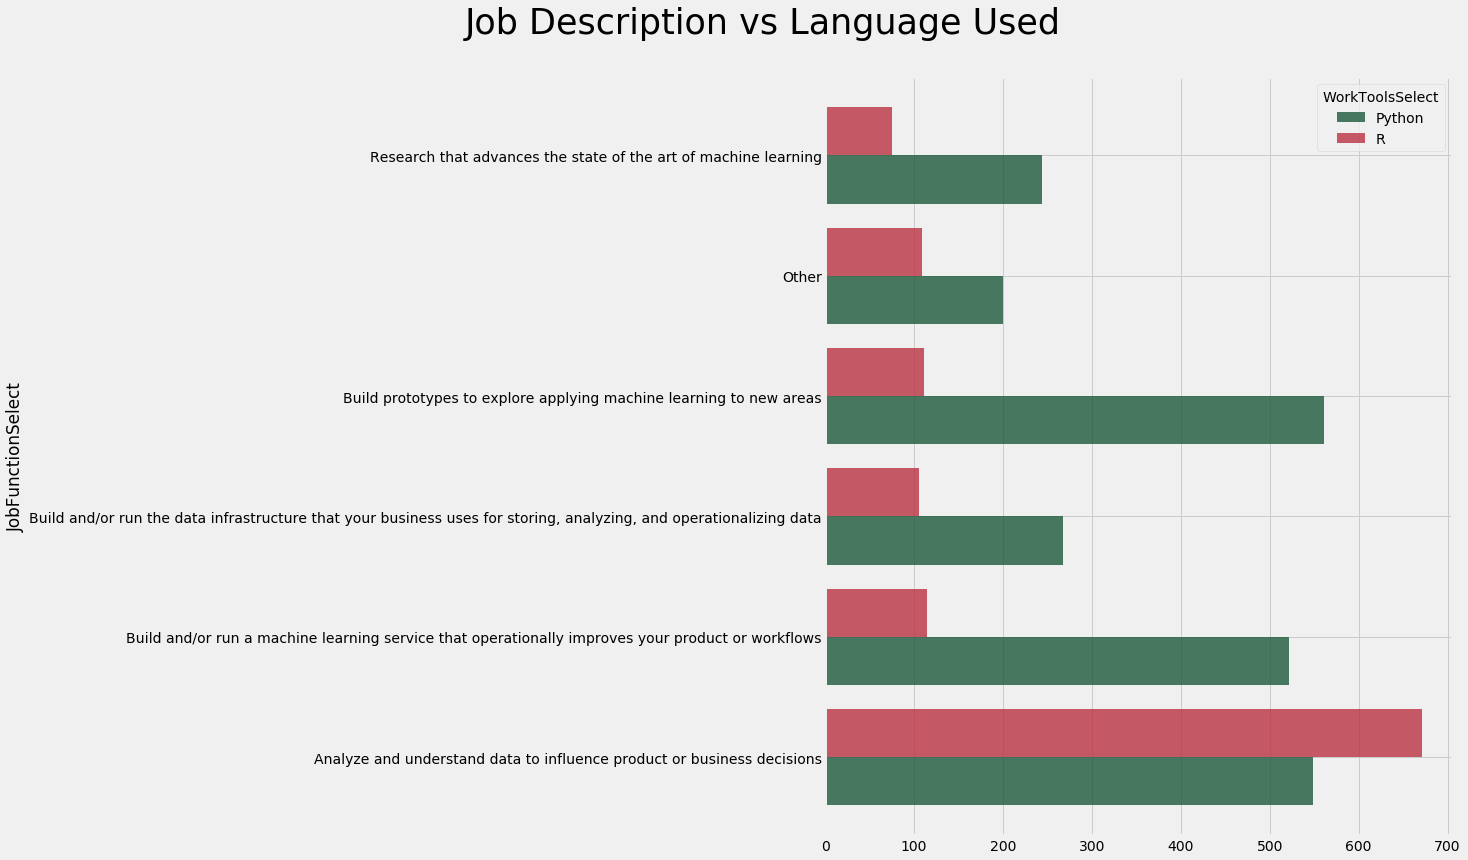

In [15]:
combined=pd.concat([p,r])
combined=combined.groupby(['JobFunctionSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
combined.pivot('JobFunctionSelect','WorkToolsSelect','Age').plot.barh(width=0.8,colors = ['#1D5939','#BB3242'],alpha = .8)
fig=plt.gcf()
fig.set_size_inches(10,13)
plt.title('Job Description vs Language Used',fontsize = 35,x= -0.1,y= 1.05)
plt.show()

**What experienced people use ?**

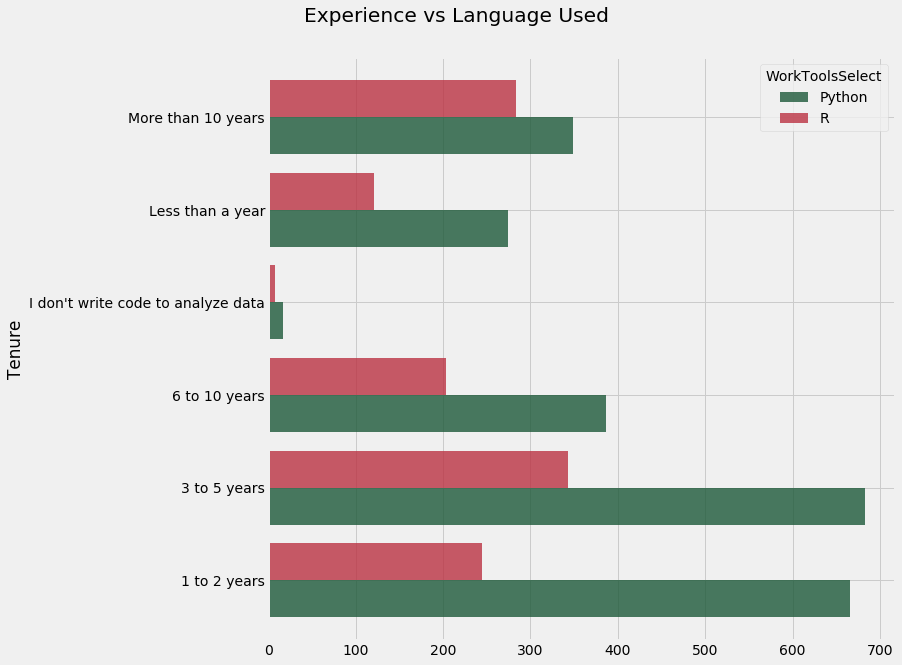

In [16]:
combined=pd.concat([p,r])
combined=combined.groupby(['Tenure','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
combined.pivot('Tenure','WorkToolsSelect','Age').plot.barh(width=0.8,colors = ['#1D5939','#BB3242'],alpha = .8)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Experience vs Language Used',x = .3,y= 1.05)
plt.show()

**Trend  in Industries **

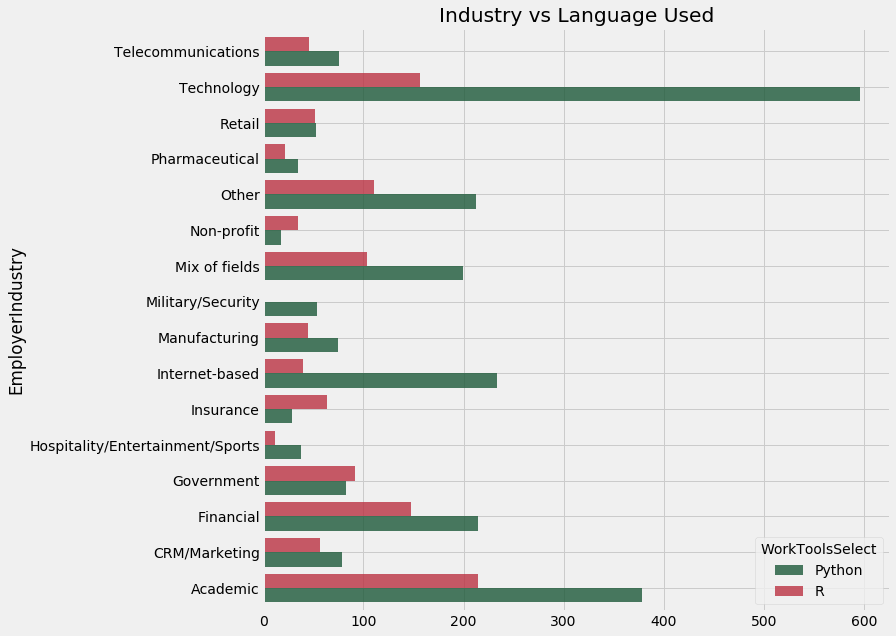

In [17]:
combined=pd.concat([p,r])
combined=combined.groupby(['EmployerIndustry','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
combined.pivot('EmployerIndustry','WorkToolsSelect','Age').plot.barh(width=0.8,colors = ['#1D5939','#BB3242'],alpha = .8)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Industry vs Language Used')
plt.show()

**Thanks a lot for going through this notebook**
  
**Any suggestions and questions are always  welcome.**